In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# Data Preparation

### Write a python program to merge data from each month into one CSV and read in updated dataframe.

In [2]:
#reading the csv files
df1 = pd.read_csv("Sales Files/Sales_January_2019.csv")
df2 = pd.read_csv("Sales Files/Sales_February_2019.csv")
df3 = pd.read_csv("Sales Files/Sales_March_2019.csv")
df4 = pd.read_csv("Sales Files/Sales_April_2019.csv")
df5 = pd.read_csv("Sales Files/Sales_May_2019.csv")
df6 = pd.read_csv("Sales Files/Sales_June_2019.csv")
df7 = pd.read_csv("Sales Files/Sales_July_2019.csv")
df8 = pd.read_csv("Sales Files/Sales_August_2019.csv")
df9 = pd.read_csv("Sales Files/Sales_September_2019.csv")
df10 = pd.read_csv("Sales Files/Sales_October_2019.csv")
df11 = pd.read_csv("Sales Files/Sales_November_2019.csv")
df12 = pd.read_csv("Sales Files/Sales_December_2019.csv")

#merging all csv files into one dataframe
annual_data = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12])

#displaying the dataframe
annual_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234.0,iPhone,1.0,700.00,1/22/2019 21:25,"944 Walnut St, Boston, MA 02215"
1,141235.0,Lightning Charging Cable,1.0,14.95,1/28/2019 14:15,"185 Maple St, Portland, OR 97035"
2,141236.0,Wired Headphones,2.0,11.99,1/17/2019 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237.0,27in FHD Monitor,1.0,149.99,1/5/2019 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238.0,Wired Headphones,1.0,11.99,1/25/2019 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
25112,319666.0,Lightning Charging Cable,1.0,14.95,12/11/2019 20:58,"14 Madison St, San Francisco, CA 94016"
25113,319667.0,AA Batteries (4-pack),2.0,3.84,12/1/2019 12:01,"549 Willow St, Los Angeles, CA 90001"
25114,319668.0,Vareebadd Phone,1.0,400.00,12/9/2019 6:43,"273 Wilson St, Seattle, WA 98101"
25115,319669.0,Wired Headphones,1.0,11.99,12/3/2019 10:39,"778 River St, Dallas, TX 75001"


### Write a python program to remove the NaN missing values from updated dataframe.

In [3]:
#checking the total number of null values in all columns
annual_data.isnull().sum()

Order ID            900
Product             900
Quantity Ordered    900
Price Each          900
Order Date          900
Purchase Address    900
dtype: int64

In [4]:
#dropping the rows that have null values and updating the dataframe
annual_data = annual_data.dropna()

In [5]:
#viewing the number of rows and columns of the updated dataframe
annual_data.shape

(185950, 6)

In [6]:
#checking the null values after removing them from all columns
annual_data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

### Write a python program to convert Quantity Ordered and Price Each to numeric.

In [7]:
#suppressing the 'SettingWithCopyWarning' warnings generated
pd.options.mode.chained_assignment = None

#converting the data type to numeric of the two columns
annual_data['Quantity Ordered'] = pd.to_numeric(annual_data['Quantity Ordered'])
annual_data['Price Each'] = pd.to_numeric(annual_data['Price Each'])

In [8]:
#viewing the data type of each column
annual_data.dtypes

Order ID            float64
Product              object
Quantity Ordered    float64
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object

### Create a new column named Month from Ordered Date of updated dataframe and convert it to integer as data type.

In [9]:
#displaying the first five rows of the dataframe
annual_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234.0,iPhone,1.0,700.00,1/22/2019 21:25,"944 Walnut St, Boston, MA 02215"
1,141235.0,Lightning Charging Cable,1.0,14.95,1/28/2019 14:15,"185 Maple St, Portland, OR 97035"
2,141236.0,Wired Headphones,2.0,11.99,1/17/2019 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237.0,27in FHD Monitor,1.0,149.99,1/5/2019 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238.0,Wired Headphones,1.0,11.99,1/25/2019 11:59,"387 10th St, Austin, TX 73301"


In [10]:
#the string values in 'Order Date' column is split into a list 
#zeroth index is accessed, which is month value
#value stored in 'Month' column 
annual_data['Month'] = annual_data['Order Date'].str.split('/').str[0]

In [11]:
#checking the data type of 'Month'
annual_data.dtypes

Order ID            float64
Product              object
Quantity Ordered    float64
Price Each          float64
Order Date           object
Purchase Address     object
Month                object
dtype: object

In [12]:
#converting the data type of 'Month' column to integer
annual_data['Month'] = annual_data['Month'].astype(int)

In [13]:
#viewing the data type of 'Month' column
annual_data.dtypes

Order ID            float64
Product              object
Quantity Ordered    float64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int32
dtype: object

### Create a new column named City from Purchase Address based on the value in updated dataframe.

In [14]:
#storing the values of 'Purchase Address' column in a list and assigning it to 'City' column
annual_data['City'] = annual_data['Purchase Address'].str.split(',')

#accessing the value stored in index 1 and assigning it to 'City' column
annual_data['City'] = annual_data['City'].str[1]

#displaying the first five rows of the dataframe
annual_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,141234.0,iPhone,1.0,700.00,1/22/2019 21:25,"944 Walnut St, Boston, MA 02215",1,Boston
1,141235.0,Lightning Charging Cable,1.0,14.95,1/28/2019 14:15,"185 Maple St, Portland, OR 97035",1,Portland
2,141236.0,Wired Headphones,2.0,11.99,1/17/2019 13:33,"538 Adams St, San Francisco, CA 94016",1,San Francisco
3,141237.0,27in FHD Monitor,1.0,149.99,1/5/2019 20:33,"738 10th St, Los Angeles, CA 90001",1,Los Angeles
4,141238.0,Wired Headphones,1.0,11.99,1/25/2019 11:59,"387 10th St, Austin, TX 73301",1,Austin


# Data Analysis

### Write a Python program to show summary statistics of sum, mean, standard deviation, skewness, and kurtosis of any chosen variable.

In [15]:
#assigning the statistics of 'Price Each' column to appropriate variables
sum_ = str(annual_data['Price Each'].sum())
mean = str(annual_data['Price Each'].mean())
std = str(annual_data['Price Each'].std())
skew = str(annual_data['Price Each'].skew())
kurt = str(annual_data['Price Each'].kurtosis())

#creating lists to store the values and index of dataframe
stats = [sum_, mean, std, skew, kurt]
index = ['Sum:', 'Mean:', 'Standard Deviation:', 'Skewness:', 'Kurtosis:']

#creating dataframe
statistics = pd.DataFrame(stats, index = index, columns = ['values'])

#displaying the sum, mean, standard deviation, skewness and kurtosis of 'Price Each' column
statistics

,values
Sum:,34289130.68
Mean:,184.39973476700638
Standard Deviation:,332.7313298840899
Skewness:,2.8721487292935266
Kurtosis:,9.094568341148207


### Write a Python program to calculate and show correlation of all variables.

In [16]:
#creating the correlation of the dataframe
correlation = annual_data.corr()
correlation

,Order ID,Quantity Ordered,Price Each,Month
Order ID,1.000000,0.000702,-0.002857,0.993063
Quantity Ordered,0.000702,1.000000,-0.148272,0.000791
Price Each,-0.002857,-0.148272,1.000000,-0.003375
Month,0.993063,0.000791,-0.003375,1.000000


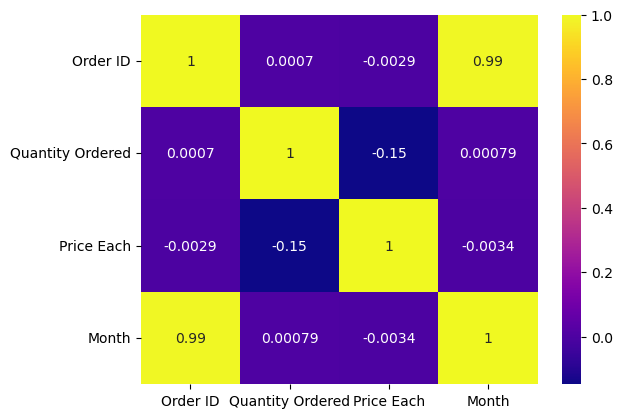

In [17]:
#creating heatmap of the correlation
heatmap = sns.heatmap(correlation, cmap = 'plasma', annot = True)

# Data Exploration

### Which Month has the best sales? and how much was the earning in that month? Make a bar graph of sales as well.

In [18]:
#calculating Total Sales by multiplying quantity ordered and price each
annual_data['Total Sales'] = annual_data['Quantity Ordered'] * annual_data['Price Each']

#displaying the dataframe
annual_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Total Sales
0,141234.0,iPhone,1.0,700.00,1/22/2019 21:25,"944 Walnut St, Boston, MA 02215",1,Boston,700.00
1,141235.0,Lightning Charging Cable,1.0,14.95,1/28/2019 14:15,"185 Maple St, Portland, OR 97035",1,Portland,14.95
2,141236.0,Wired Headphones,2.0,11.99,1/17/2019 13:33,"538 Adams St, San Francisco, CA 94016",1,San Francisco,23.98
3,141237.0,27in FHD Monitor,1.0,149.99,1/5/2019 20:33,"738 10th St, Los Angeles, CA 90001",1,Los Angeles,149.99
4,141238.0,Wired Headphones,1.0,11.99,1/25/2019 11:59,"387 10th St, Austin, TX 73301",1,Austin,11.99
...,...,...,...,...,...,...,...,...,...
25112,319666.0,Lightning Charging Cable,1.0,14.95,12/11/2019 20:58,"14 Madison St, San Francisco, CA 94016",12,San Francisco,14.95
25113,319667.0,AA Batteries (4-pack),2.0,3.84,12/1/2019 12:01,"549 Willow St, Los Angeles, CA 90001",12,Los Angeles,7.68
25114,319668.0,Vareebadd Phone,1.0,400.00,12/9/2019 6:43,"273 Wilson St, Seattle, WA 98101",12,Seattle,400.00
25115,319669.0,Wired Headphones,1.0,11.99,12/3/2019 10:39,"778 River St, Dallas, TX 75001",12,Dallas,11.99


In [19]:
#grouping the 'Total Sales' column by Month and summing the entire column
monthly_sales = annual_data.groupby('Month')['Total Sales'].sum()
monthly_sales

Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Total Sales, dtype: float64

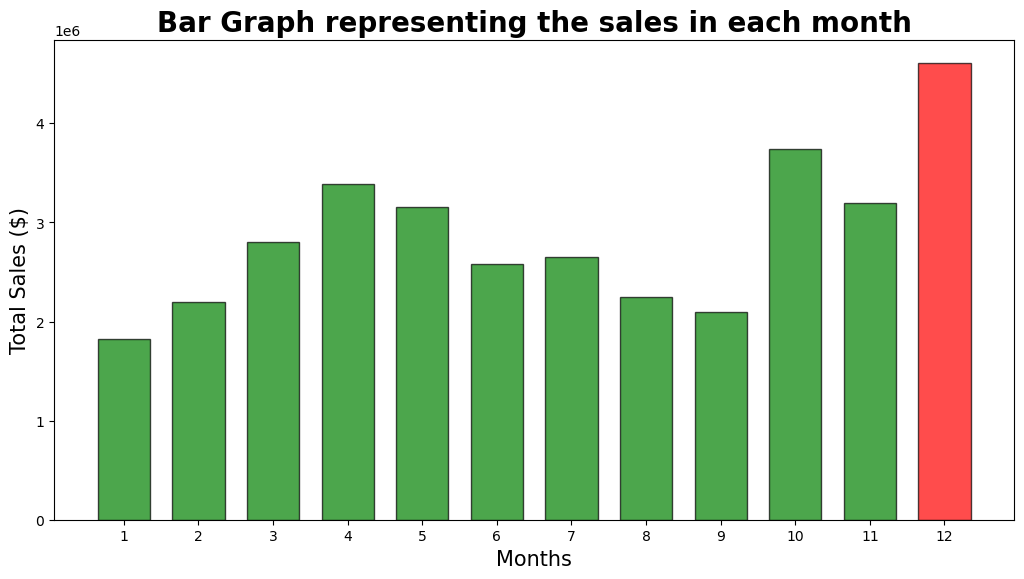

The month with best sales: 12
The earning in the best sales month: $4613443.34


In [20]:
#creating figure and defining axes
fig = plt.figure()
axes = fig.add_axes([0,0,1.5,1])

#creating a list of colors
color = ['green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'red']

#creating bar graph
axes.bar(monthly_sales.index, monthly_sales.values, color = color, edgecolor = 'black', width = 0.7, alpha = 0.7)

#Setting labels and title
axes.set_xlabel('Months', fontsize = 15)
axes.set_ylabel('Total Sales ($)', fontsize = 15)
axes.set_xticks(monthly_sales.index)
axes.set_title('Bar Graph representing the sales in each month', fontsize = 20, fontweight = 'bold')

#displaying the plot
plt.show()

#displaying the best sales month and its earning
print('The month with best sales: ' + str(monthly_sales.idxmax()))
print('The earning in the best sales month: $' + str(monthly_sales.max()))

### Which city has sold the highest product?

In [21]:
#grouping the 'Quantity Ordered' column by 'City'
most_product_sold_city = annual_data.groupby('City')['Quantity Ordered'].sum()
most_product_sold_city

City
 Atlanta          16602.0
 Austin           11153.0
 Boston           22528.0
 Dallas           16730.0
 Los Angeles      33289.0
 New York City    27932.0
 Portland         14053.0
 San Francisco    50239.0
 Seattle          16553.0
Name: Quantity Ordered, dtype: float64

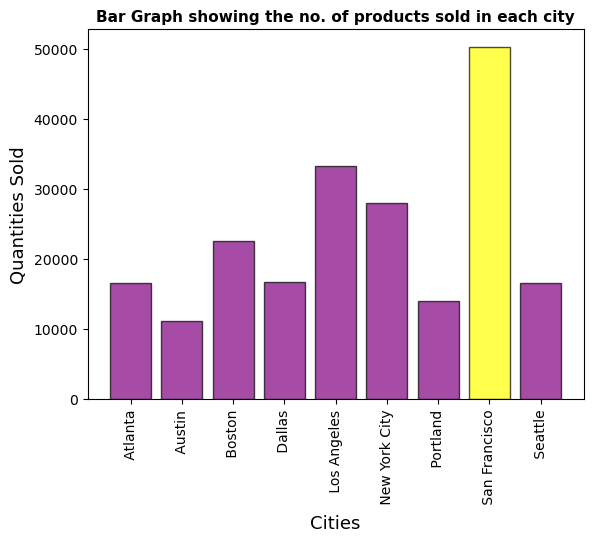

The city that sold the highest number of products:  San Francisco


In [22]:
#creating a list of colors
color_1 = ['purple', 'purple', 'purple', 'purple', 'purple', 'purple', 'purple', 'yellow', 'purple']

#plotting bar graph
plt.bar(most_product_sold_city.index, most_product_sold_city.values, color = color_1, edgecolor = 'black', alpha = 0.7)

#Setting labels and title
plt.xticks(rotation=90)
plt.xlabel('Cities', fontsize = 13)
plt.ylabel('Quantities Sold', fontsize = 13)
plt.title('Bar Graph showing the no. of products sold in each city', fontsize = 11 , fontweight = 'bold')

#displaying the plot
plt.show()

#displaying the city that sold most product
highest_product_sold_city = print("The city that sold the highest number of products: " + str(most_product_sold_city.idxmax()))

### Which product was sold the most in overall? Illustrate it through bar graph.

In [23]:
#grouping the 'Quantity Ordered' column by 'Product'
most_sold_product = annual_data.groupby('Product')['Quantity Ordered'].sum()
most_sold_product

Product
20in Monitor                   4129.0
27in 4K Gaming Monitor         6244.0
27in FHD Monitor               7550.0
34in Ultrawide Monitor         6199.0
AA Batteries (4-pack)         27635.0
AAA Batteries (4-pack)        31017.0
Apple Airpods Headphones      15661.0
Bose SoundSport Headphones    13457.0
Flatscreen TV                  4819.0
Google Phone                   5532.0
LG Dryer                        646.0
LG Washing Machine              666.0
Lightning Charging Cable      23217.0
Macbook Pro Laptop             4728.0
ThinkPad Laptop                4130.0
USB-C Charging Cable          23975.0
Vareebadd Phone                2068.0
Wired Headphones              20557.0
iPhone                         6849.0
Name: Quantity Ordered, dtype: float64

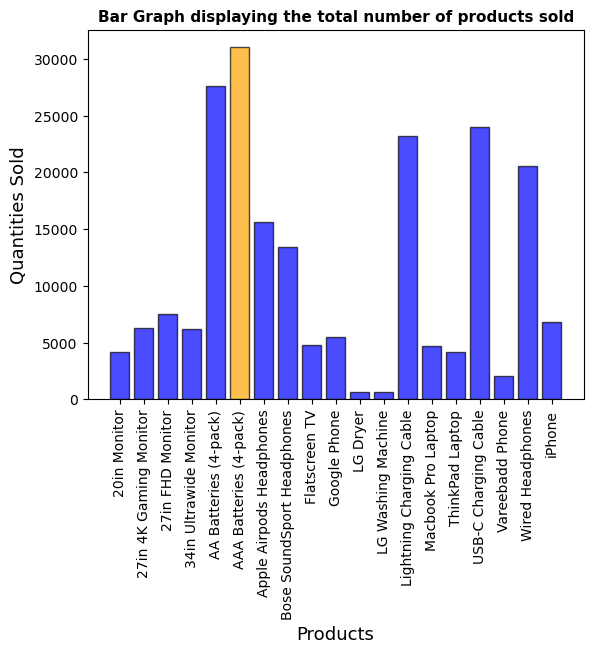

The most sold product: AAA Batteries (4-pack)


In [24]:
#creating a list of colors
color_2 = ['blue', 'blue', 'blue', 'blue', 'blue', 'orange', 'blue', 'blue', 'blue', 'blue', 
           'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue']

#plotting bar graph
plt.bar(most_sold_product.index, most_sold_product.values, color = color_2, edgecolor = 'black', alpha = 0.7)

#setting labels and title
plt.xticks(rotation=90)
plt.xlabel('Products', fontsize = 13)
plt.ylabel('Quantities Sold', fontsize = 13)
plt.title('Bar Graph displaying the total number of products sold', fontsize = 11, fontweight = 'bold')

#displaying the plot
plt.show()

#displaying the most sold product
print('The most sold product: ' + most_sold_product.idxmax())

### Write a Python program to show histogram plot of any chosen variables. Use proper labels in the graph.

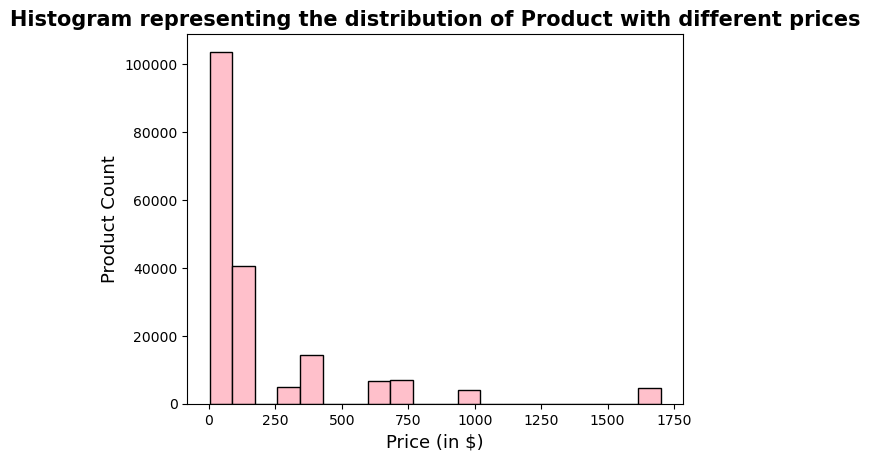

In [25]:
#plotting histogram
plt.hist(annual_data['Price Each'], bins = 20, edgecolor = 'black', color = 'pink')

#setting labels and title
plt.xlabel('Price (in $)', fontsize = 13)
plt.ylabel('Product Count', fontsize = 13)
plt.title('Histogram representing the distribution of Product with different prices', fontsize = 15, fontweight = 'bold')

#displaying the plot
plt.show()